In [1]:
import numpy as np
from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True,        # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=False)

print('train dataset : ', len(mnist_train))

train dataset :  60000


In [3]:
train_dataset = mnist_train.data.numpy()
train_labels  = mnist_train.targets.numpy()


print(train_dataset.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
# set Test Parameter
n_data = train_dataset.shape[0]
n_feature = train_dataset.shape[1]*train_dataset.shape[2]

b_size  = 64                # batch size
n_batch = n_data // b_size  # Drop Last

epochs = 20                 # Epochs
lr = 0.03                   # Learning Rate
units = [64, 32, 10]        # 3 Dense Layer neurons

In [5]:
# initialize w, b
W1 = np.random.normal(0, 1, (n_feature, units[0]))
B1 = np.zeros((units[0]))
W2 = np.random.normal(0, 1, (units[0], units[1]))
B2 = np.zeros((units[1]))
W3 = np.random.normal(0, 1, (units[1], units[2]))
B3 = np.zeros((units[2]))

print(f"W1/B1: {W1.shape}/{B1.shape}")
print(f"W2/B2: {W2.shape}/{B2.shape}")
print(f"W3/B3: {W3.shape}/{B3.shape}\n")

W1/B1: (784, 64)/(64,)
W2/B2: (64, 32)/(32,)
W3/B3: (32, 10)/(10,)



In [6]:
losses, accs = list(), list()

for epoch in range(epochs):          # For epochs
    n_correct, n_data = 0, 0         #  Calculate Accuracy for Each Epoch
    for b_idx in range(n_batch):     # For batches
        # get mini-batch
        images = train_dataset[b_idx*b_size : (b_idx + 1)*b_size, ...]

        # image Normalize
        X = images.reshape(b_size, -1) / 255.                   # (64, 784)
        Y = train_labels[b_idx*b_size : (b_idx + 1)*b_size]     # (64,)
        # print(X.shape, Y.shape)                                 

        ### forward propagation
        # dense1
        Z1 = X @ W1 + B1             # Affine                   # (64, 64)
        A1 = 1/(1 + np.exp(-Z1))     # Sigmoid                  # (64, 64)
        # dense2
        Z2 = A1 @ W2 + B2            # Affine                   # (64, 32)
        A2 = 1/(1 + np.exp(-Z2))     # sigmoid                  # (64, 32)
        # dense3
        L = A2 @ W3 + B3             # Affine                   # (64, 10)   
        Pred = np.exp(L)/np.sum(np.exp(L), axis=1, keepdims=True)  # Softmax    Predict shape (64, 10)
        # loss                                                                    Label shape (64, )
        J = np.mean(-np.log(Pred[np.arange(b_size), Y]))            # CEEE : 0 인 위치 곱하면 어차피 0, Label index만 가져옴
        losses.append(J)
        
        # calculate accuracy
        Pred_label = np.argmax(Pred, axis=1)
        n_correct += np.sum(Pred_label == Y)
        n_data += b_size
        
        ### backpropagation
        labels = Y.copy()                 # Laber Vector
        Y = np.zeros_like(Pred)
        Y[np.arange(b_size), labels] = 1  # One-hot Encoding
        # loss
        dL = -1/b_size*(Y - Pred)
        # dense3
        dA2 = dL @ W3.T
        dW3 = A2.T @ dL
        dB3 = np.sum(dL, axis=0)
        # dense2
        dZ2 = dA2 * A2*(1-A2)        # Sigmoid
        dA1 = dZ2 @ W2.T
        dW2 = A1.T @ dZ2
        dB2 = np.sum(dZ2, axis=0)
        # dense1
        dZ1 = dA1 * A1*(1-A1)        # Sigmoid
        dW1 = X.T @ dZ1
        dB1 = np.sum(dZ1, axis=0)
        
        # parameter update
        W3, B3 = W3-lr*dW3, B3-lr*dB3
        W2, B2 = W2-lr*dW2, B2-lr*dB2
        W1, B1 = W1-lr*dW1, B1-lr*dB1
    accs.append(n_correct/n_data)

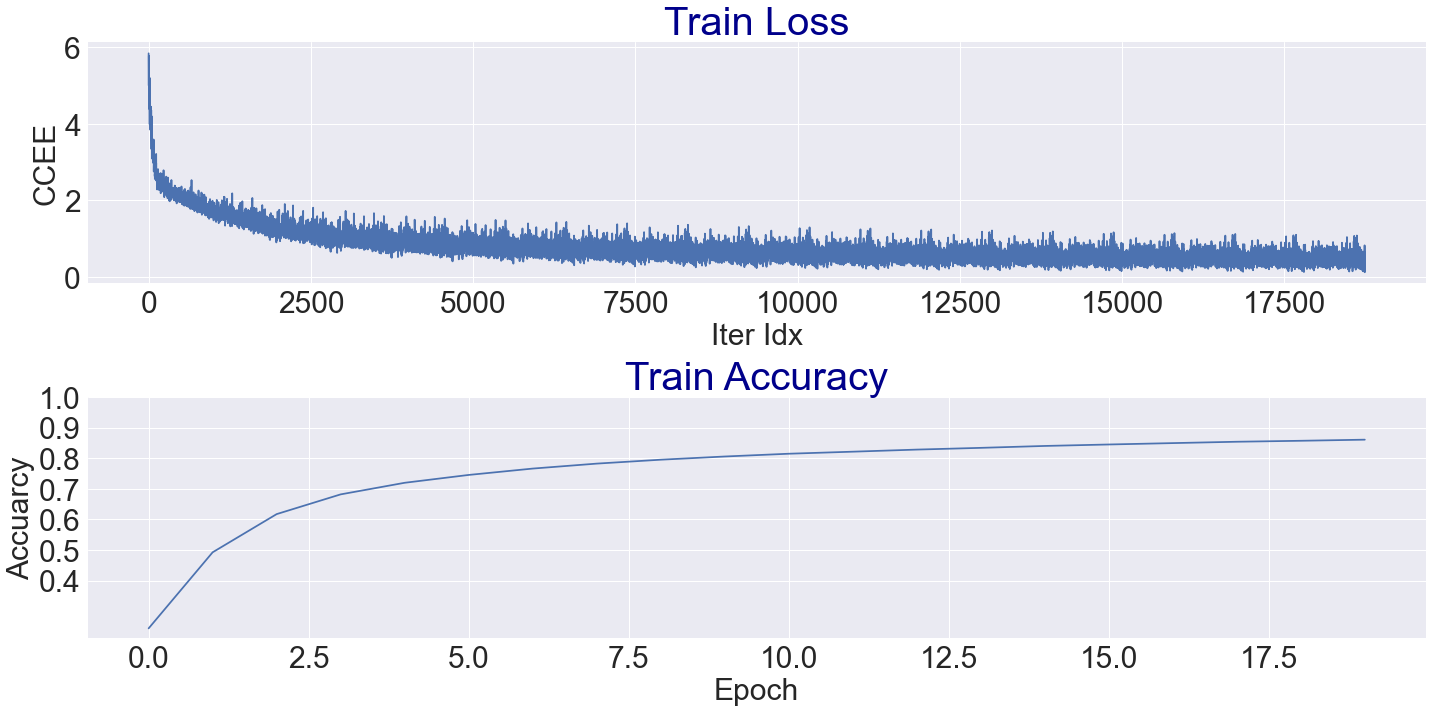

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(losses)
axes[1].plot(accs)
axes[0].set_title("Train Loss", color='darkblue', fontsize=40)
axes[0].set_xlabel("Iter Idx", fontsize=30)
axes[0].set_ylabel("CCEE", fontsize=30)
axes[1].set_title("Train Accuracy", color='darkblue', fontsize=40)
axes[1].set_xlabel("Epoch", fontsize=30)
axes[1].set_ylabel("Accuarcy", fontsize=30)
axes[1].set_yticks(np.linspace(0.4, 1.0, 7))
axes[0].tick_params(labelsize=30)
axes[1].tick_params(labelsize=30)
fig.tight_layout()